In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_LOCATION = './data/raw/train_data.csv'

### Renaming columns

In [3]:
data = pd.read_csv(DATA_LOCATION)
data.rename(columns={'Unnamed: 0':'id'}, inplace=True)
data.rename(columns={'continuous_target_1':'continous_target_1'}, inplace=True)

In [4]:
data.head(5)

id                                           features  \
0  110018  “Today, as in the past,” reads the title of th...   
1   14618  Crisp, dry and searing in acidity, this 100% v...   
2  108512  Light and lovely, this has just under 2% resid...   
3  129544  Borra's blend of 80% Petite Sirah, 10% Syrah a...   
4   85383  The spirit of South Africa's Swartland region ...   

  categorical_target_1 categorical_target_2  continous_target_1  \
0               France      Sauvignon Blanc                  92   
1                   US      Sauvignon Blanc                  91   
2                   US             Riesling                  90   
3                   US            Red Blend                  89   
4         South Africa               Shiraz                  87   

   continous_target_2  
0                28.0  
1                22.0  
2                10.0  
3                35.0  
4                19.0

### Analysing Entries with Scores 90-100

In [36]:
scores = data.continous_target_1.value_counts(sort=False).to_frame()

In [37]:
threshold = 90
statistic = data.continous_target_1.value_counts(sort=False).to_frame()
n = statistic.iloc[scores.index >= threshold].continous_target_1.sum()
top_n = data.nlargest(n, 'continous_target_1') # top n highest value for column
top_n

id                                           features  \
1280       345  This wine contains some material over 100 year...   
3794     39286  A perfect wine from a classic vintage, the 200...   
11446   111755  This is the finest Cheval Blanc for many years...   
19793    89728  This latest incarnation of the famous brand is...   
27797    89729  This new release from a great vintage for Char...   
...        ...                                                ...   
103924   79624  The opening of peach, mineral, honey and wild ...   
103926  120218  Fresh apple and pear flavors are swathed in fr...   
103934  117534  Very opulent, almost too much so, with a flood...   
103949   99167  Known for working well with the grape, this Ra...   
103967  121055  Lightly briny citrus aromas are typical of thi...   

       categorical_target_1      categorical_target_2  continous_target_1  \
1280              Australia                    Muscat                 100   
3794                  Italy                    Merlot                 100   
11446                France  Bordeaux-style Red Blend                 100   
19793                France           Champagne Blend                 100   
27797                France                Chardonnay                 100   
...                     ...                       ...                 ...   
103924                Spain                   Godello                  90   
103926              Germany                  Riesling                  90   
103934                   US                Chardonnay                  90   
103949         South Africa  Bordeaux-style Red Blend                  90   
103967                Spain               White Blend                  90   

        continous_target_2  
1280                 350.0  
3794                 460.0  
11446               1500.0  
19793                250.0  
27797                617.0  
...                    ...  
103924                18.0  
103926                60.0  
103934                30.0  
103949                20.0  
103967                22.0  

[39301 rows x 6 columns]

### Types of wines with price >100  & between 90-100 points

In [91]:
statistics_top_n = top_n.categorical_target_2.value_counts().to_frame()
statisitcs_filtered = statistics_top_n.loc[statistics_top_n.categorical_target_2 > 100]
statisitcs_filtered['wine_type'] = statisitcs_filtered.index.to_numpy()
statisitcs_filtered = statisitcs_filtered.reset_index(drop=True)

plt.figure(figsize=(70,40))
g = sns.barplot(y='categorical_target_2', x='wine_type', data=statisitcs_filtered, palette='Set3', capsize=20) 
g.set_title("Wine types with scores between 90-100", fontsize=40)
g.set_xlabel('Wine types', fontsize=40) 
g.set_ylabel('Wine price', fontsize=40)
plt.show() 

C:\Users\ivasc\Anaconda3\envs\tf_home\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Countries with most wines  between 90-100 points

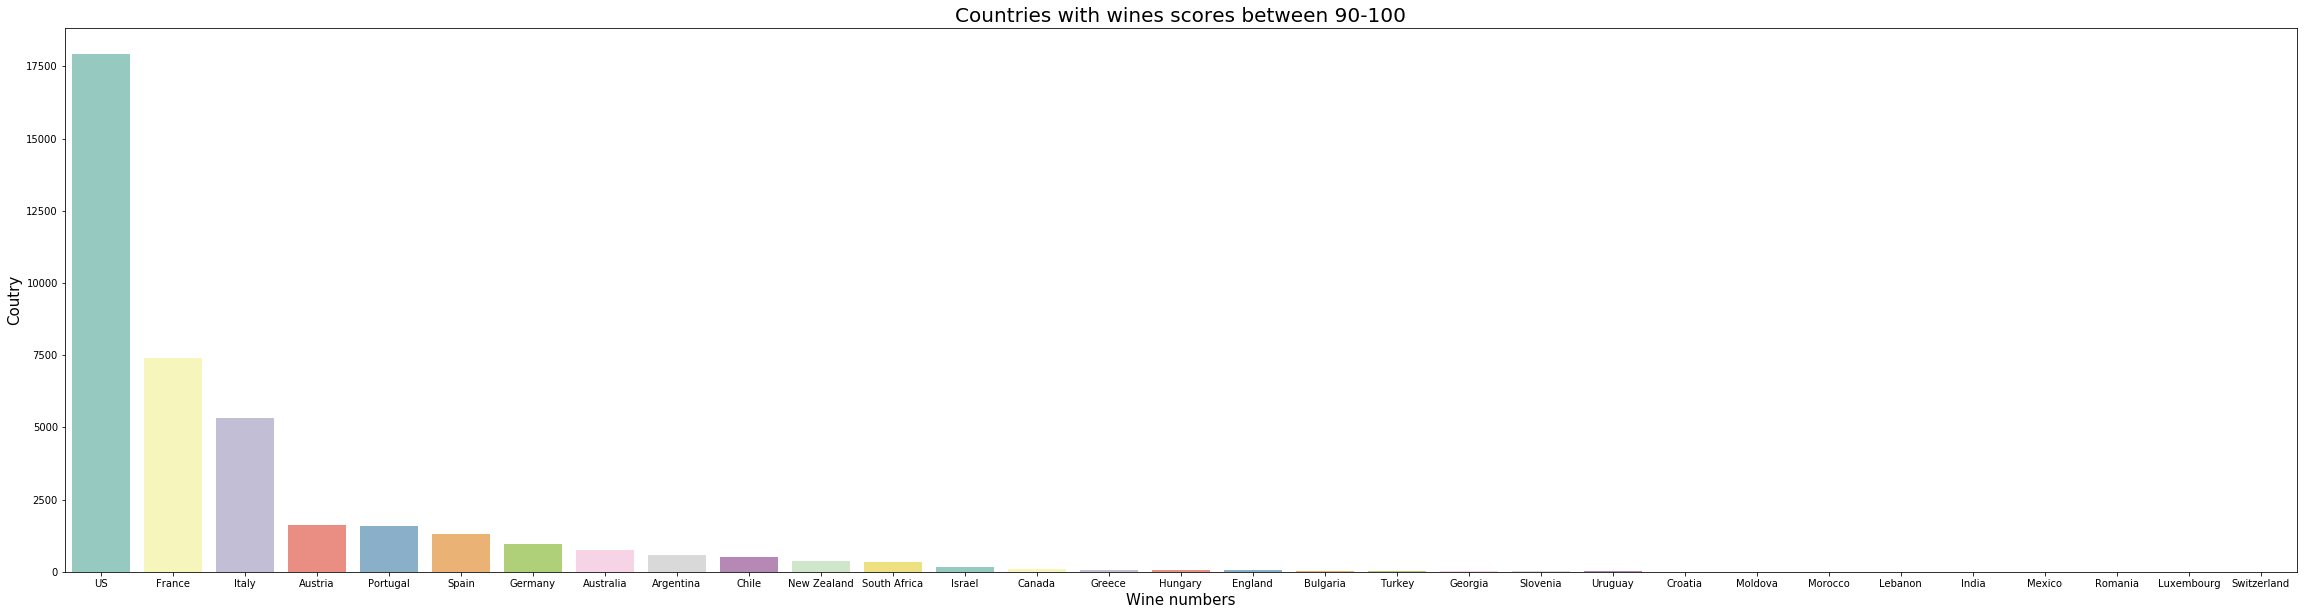

In [74]:
statistics_top_n = top_n.categorical_target_1.value_counts().to_frame()
statistics_top_n['country'] = statistics_top_n.index.to_numpy()
statistics_top_n = statistics_top_n.reset_index(drop=True)

plt.figure(figsize=(40,10))
g = sns.barplot(y='categorical_target_1', x='country', data=statistics_top_n, palette='Set3') 
g.set_title("Countries with wines scores between 90-100", fontsize=20)
g.set_xlabel('Wine numbers', fontsize=15) 
g.set_ylabel('Coutry', fontsize=15)
plt.show() 

 ### Plot features vs continous_target_1

C:\Users\ivasc\Anaconda3\envs\tf_home\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


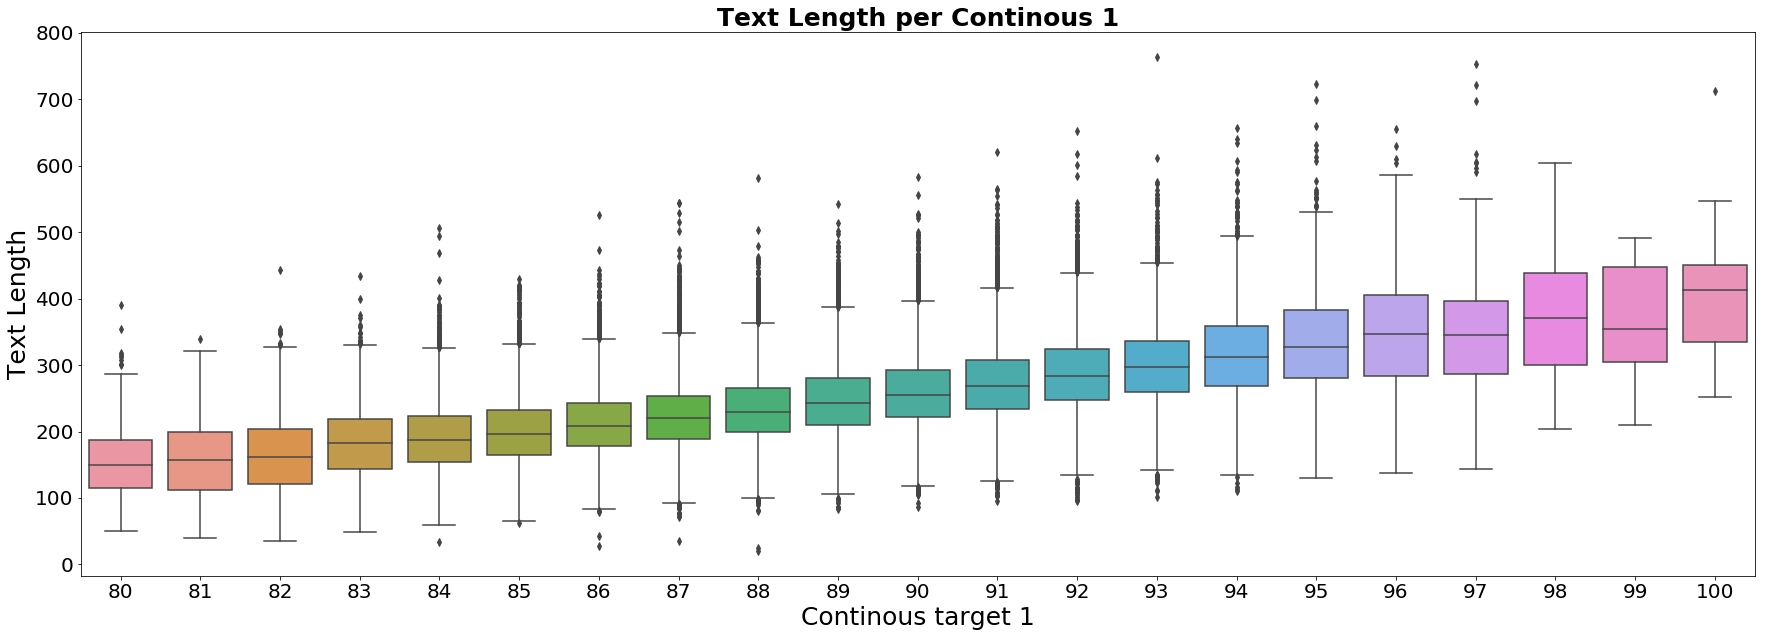

In [21]:
data_con1_vs_text = data[['features', 'continous_target_1']]
data_con1_vs_text['len_features'] = data_con1_vs_text.features.str.len()

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='continous_target_1', y='len_features', data=data_con1_vs_text)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Text Length per Continous 1', fontweight="bold", size=25) # Title
ax.set_ylabel('Text Length', fontsize = 25) # Y label
ax.set_xlabel('Continous target 1', fontsize = 25) # X label
plt.show()

### Checking for NaNs

In [22]:
pd.isnull(data).sum() > 0

id                      False
features                False
categorical_target_1     True
categorical_target_2     True
continous_target_1      False
continous_target_2       True
dtype: bool

In [8]:
data.iloc[np.where(data.continous_target_1.isnull().values == True)[0]]

Empty DataFrame
Columns: [id, features, categorical_target_1, categorical_target_2, continous_target_1, continous_target_2]
Index: []

### plots feature continous_target_1 

In [25]:
plt.figure(figsize=(16,5))
g = sns.countplot(x='continous_target_1', data=data, color='gold') 
g.set_title("Continous 1 count distribuition ", fontsize=20)
g.set_xlabel("Continous 1", fontsize=15) 
g.set_ylabel("Count", fontsize=15)
plt.show() 

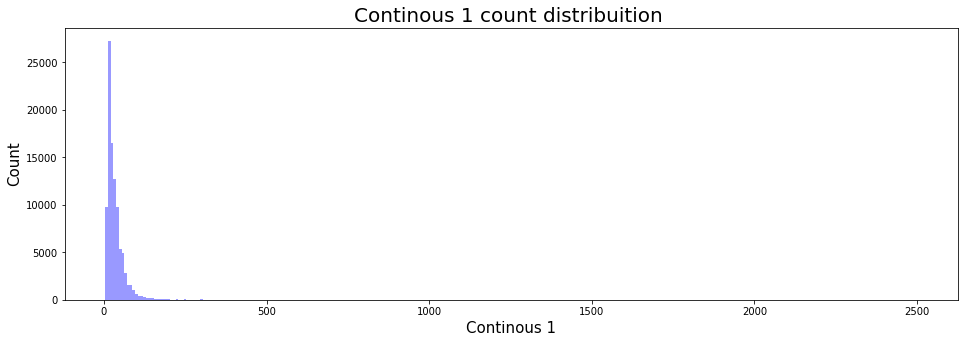

In [29]:
plt.figure(figsize=(16,5))
g = sns.distplot(data.continous_target_2,bins=300, kde=False, color="b")
g.set_title("Continous 1 count distribuition ", fontsize=20)
g.set_xlabel("Continous 1", fontsize=15) 
g.set_ylabel("Count", fontsize=15)
plt.show() 

### Correlation matrix

In [53]:
corr_matrix = data.corr(method='spearman')

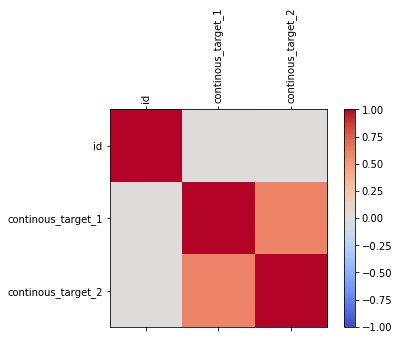

In [52]:
cont_columns = []
cont_columns.extend([data.columns.to_list()[0]])
cont_columns.extend(data.columns.to_list()[-2:])


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(cont_columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(cont_columns)
ax.set_yticklabels(cont_columns)
plt.show()

### summary data

In [34]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).drop(['id'], axis=1).columns
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index(['features', 'categorical_target_1', 'categorical_target_2'], dtype='object')

In [113]:
def summary(df):
    dict_summary = {}
    dict_summary.setdefault("name", [])
    dict_summary.setdefault("type", [])
    dict_summary.setdefault("unique_values", [])
    dict_summary.setdefault("missing_values", [])
    dict_summary.setdefault("mean", [])
    dict_summary.setdefault("std", [])
    dict_summary.setdefault("min", [])
    dict_summary.setdefault("max", [])
    dict_summary.setdefault("outliers", [])
    dict_summary.setdefault("outliers_percentual", [])
    
    described_data = df.describe()
    
    for col in df.columns.to_list()[1:]: # excludes id column
        dict_summary["name"].append(col)
        dict_summary["type"].append(str(df[col].dtype))
        dict_summary["unique_values"].append(df[col].nunique())
        dict_summary["missing_values"].append(df[col].isnull().sum())
        
        if 'features' in col:
            dict_summary["min"].append(len(df[col].min()))
            dict_summary["max"].append(len(df[col].max()))
            dict_summary["mean"].append(np.NaN)
            dict_summary["std"].append(np.NaN)
            dict_summary["outliers"].append(np.NaN)
            dict_summary["outliers_percentual"].append(np.NaN)
            
        if 'continous' in col:
            dict_summary["mean"].append(described_data[col]["mean"])
            dict_summary["std"].append(described_data[col]["std"])
            dict_summary["min"].append(described_data[col]["min"])
            dict_summary["max"].append(described_data[col]["max"])
            outliers_cut = described_data[col]["std"]*2.5
            bound_inf = described_data[col]["mean"] - outliers_cut
            bound_sup = described_data[col]["mean"] + outliers_cut
            outliers = [x for x in df[col] if x < bound_inf or x > bound_sup]
            non_outliers = [x for x in df[col] if x > bound_inf and x < bound_sup]
            dict_summary["outliers"].append(len(outliers))
            dict_summary["outliers_percentual"].append(round((len(outliers) / len(non_outliers) )*100, 4))
       
        if 'categorical' in col:   
            dict_summary["mean"].append(np.NaN)
            dict_summary["std"].append(np.NaN)
            dict_summary["min"].append(np.NaN)
            dict_summary["max"].append(np.NaN)
            dict_summary["outliers"].append(np.NaN)
            dict_summary["outliers_percentual"].append(np.NaN)
    
    return pd.DataFrame(dict_summary)
        
summary(data)        

name     type  unique_values  missing_values       mean  \
0              features   object          97529               0        NaN   
1  categorical_target_1   object             43              49        NaN   
2  categorical_target_2   object            672               1        NaN   
3    continous_target_1    int64             21               0  88.452662   
4    continous_target_2  float64            371            7247  35.450062   

         std    min     max  outliers  outliers_percentual  
0        NaN  198.0   338.0       NaN                  NaN  
1        NaN    NaN     NaN       NaN                  NaN  
2        NaN    NaN     NaN       NaN                  NaN  
3   3.038889   80.0   100.0     607.0               0.5872  
4  41.120601    4.0  2500.0    1387.0               1.4548